In [1]:
# You will need the following libraries:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Import param_functions
#import sys
#sys.path.append('your_python_library/parampy/')
import parampy as pf

In [2]:
# Redefine figure default parameters:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize':'xx-large',
          'axes.linewidth':'1.5',
          
          'xtick.labelsize':'x-large',
          'xtick.major.size':'7',
          'xtick.major.width':'2',
          'xtick.minor.visible' : True,
          'xtick.minor.width':'1.8',
          'xtick.minor.size':'4',
          'xtick.direction' : 'in',
          'xtick.top': True,
                   
          'ytick.labelsize':'x-large',
          'ytick.major.width':'2',
          'ytick.major.size':'7',
          'ytick.minor.visible' : True,
          'ytick.minor.width':'1.8',
          'ytick.minor.size':'4',
          'ytick.direction' : 'in',
          'ytick.right': True,
          
          'figure.subplot.wspace':'0.4',
          'figure.subplot.wspace':'0.4'
         }
pylab.rcParams.update(params)
#pylab.rcParams.keys()

In [3]:
# Change pandas options
pd.set_option("display.max_columns", None)
pd.set_option('display.max_seq_item', None)

# Introduction

This report presents examples about how to use parampy functions and analyse your PARAM data.
 
As data set I selected 5 random stars from APOKASC2 catalogue, which adopts spectroscopic parameters from APOGEE DR14. You can download it [here](https://ia2-owncloud.oats.inaf.it/index.php/s/2TLgzMiib1lfMEO). I present the results for 2 cases:

* Results of the PARAM 1 step method with input parameters:
    * __1s_p__: $T_{\rm eff}$, $[$Fe/H$]$, $\Delta_\nu$, $\nu_{\rm max}$, and $\varpi$;
    
* Results of the PARAM 2 step method from Rodrigues et al. ([2014](http://adsabs.harvard.edu/abs/2014MNRAS.445.2758R), [2017](http://adsabs.harvard.edu/abs/2017MNRAS.467.1433R)) with input parameters :
    * __2s__: $T_{\rm eff}$, $[$Fe/H$]$, $\Delta_\nu$, and $\nu_{\rm max}$.

# Reading PARAM input and output files

In [4]:
# Reading PARAM inputs and outputs - mode
P2s_M = pf.read_param_inp_outs("Samples/2019.05.23_Dnu_numax_2s_MESA_example/", "inp_mo_pdf")
P1s_p_M = pf.read_param_inp_outs("Samples/2019.05.17_Dnu_numax_par_1s_MESA_example/", "inp_mo_pdf")

# Reading median values
#P2s_M_me = pf.read_param_inp_outs("Sample/2018.05.23_APOKASC_Dnu_numax_2s_MESA_example/", "median", "inp_me_pdf")
#P1s_p_M_me = pf.read_param_inp_outs("Sample/2018.05.23_APOKASC_Dnu_numax_2s_MESA_example/", "median", "inp_me_pdf")

P2s_M.df.head()

Reading Samples/2019.05.23_Dnu_numax_2s_MESA_example/apokasc_param.in
Reading Samples/2019.05.23_Dnu_numax_2s_MESA_example/apokasc_param_mo.out
Reading Samples/2019.05.23_Dnu_numax_2s_MESA_example/input_pdfs_mo.out
Reading Samples/2019.05.17_Dnu_numax_par_1s_MESA_example/apokasc_param.in
Reading Samples/2019.05.17_Dnu_numax_par_1s_MESA_example/apokasc_param_mo.out
Reading Samples/2019.05.17_Dnu_numax_par_1s_MESA_example/apokasc_input_pdfs_mo.out


KEPLER_INT  APOKASC2_DELTA_NU  APOKASC2_DELTA_NU_ERR  APOKASC2_NU_MAX  \
0    10000207              8.838                0.03535           94.585   
1    10000547             13.227                0.05291          160.450   
2    10001167              2.752                0.01101           19.847   
3    10001326              5.049                0.02020           47.612   
4    10001440              5.106                0.02042           44.273   

   APOKASC2_NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  EVOLST  FE_H_ADOP_COR  \
0              0.85127       NaN           NaN       0       -0.17524   
1              1.44405      82.6           1.1       0       -0.19772   
2              0.17862       NaN           NaN       0       -0.60166   
3              0.42851       NaN           NaN       0       -0.01798   
4              0.39846       NaN           NaN       0       -0.61128   

   FE_H_ADOP_COR_ERR    TEFF_COR  TEFF_COR_ERR  LOGG_COR  LOGG_COR_ERR  \
0            0.03200  4702.51807      73.83080   2.78723       0.05954   
1            0.03779  4968.30029      85.08516   3.10721       0.06098   
2            0.03678  4555.69971      65.75724   2.23434       0.06480   
3            0.02857  4655.78467      72.54969   2.57385       0.05680   
4            0.03961  4712.21777      79.34872   2.47826       0.07248   

     GAIA_L    GAIA_B  KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  \
0  77.38847  17.20094   12.451          NaN      13.197            0.01   
1  77.48463  17.07803   12.220          NaN      12.867            0.01   
2  77.56797  16.84198   10.050          NaN      10.834            0.01   
3  77.58508  16.77371   12.715          NaN      13.523            0.01   
4  77.67406  16.75772   13.033          NaN      13.749            0.01   

   R_SDSS_PIN  R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  \
0      12.360            0.01      12.082            0.01      11.951   
1      12.142            0.01      11.887            0.01      11.773   
2      10.004            0.01       9.669            0.01       9.516   
3      12.640            0.01      12.324            0.01      12.153   
4      12.963            0.01      12.676            0.01      12.516   

   Z_SDSS_PIN_ERR  DDO51_M  DDO51_MAG_ERR  J_MAG_2M  J_MAG_ERR  H_MAG_2M  \
0            0.03      NaN            NaN    10.811      0.021    10.261   
1            0.03      NaN            NaN    10.712      0.021    10.247   
2            0.03      NaN            NaN     8.395      0.023     7.849   
3            0.03      NaN            NaN    11.033      0.022    10.442   
4            0.03      NaN            NaN    11.399      0.021    10.889   

   H_MAG_ERR  K_MAG_2M  K_MAG_ERR      W1  W1_ERR      W2  W2_ERR      W3  \
0      0.017    10.172      0.012  10.113   0.023  10.196   0.020  10.023   
1      0.019    10.161      0.014  10.092   0.023  10.163   0.021  10.049   
2      0.036     7.747      0.023   7.658   0.026   7.754   0.020   7.658   
3      0.020    10.360      0.011  10.297   0.022  10.386   0.020  10.166   
4      0.020    10.774      0.011  10.711   0.023  10.775   0.020  10.631   

   W3_ERR     W4  W4_ERR  AV_INP  EAV_INP  LUM  LUM_ERR  GAIA_PARALLAX_DR2  \
0   0.038  9.458     NaN     NaN      NaN  NaN      NaN            0.77810   
1   0.045  8.773     NaN     NaN      NaN  NaN      NaN            0.92890   
2   0.017  7.739   0.128     NaN      NaN  NaN      NaN            1.22702   
3   0.042  9.234     NaN     NaN      NaN  NaN      NaN            0.42741   
4   0.059  8.952   0.300     NaN      NaN  NaN      NaN            0.40273   

   GAIA_PARALLAX_DR2_ERR            2MASS_ID         RA       DEC  \
0                0.02150  2M19052985+4654372  286.37441  46.91034   
1                0.02169  2M19062193+4657016  286.59138  46.95045   
2                0.02674  2M19074937+4656118  286.95574  46.93662   
3                0.02163  2M19081378+4655345  287.05743  46.92627   
4                0.01767  2M19083023+4

In [5]:
P1s_p_M.df.head()

KEPLER_INT  APOKASC2_DELTA_NU  APOKASC2_DELTA_NU_ERR  APOKASC2_NU_MAX  \
0    10000207              8.838                0.03535           94.585   
1    10000547             13.227                0.05291          160.450   
2    10001167              2.752                0.01101           19.847   
3    10001326              5.049                0.02020           47.612   
4    10001440              5.106                0.02042           44.273   

   APOKASC2_NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  EVOLST  FE_H_ADOP_COR  \
0              0.85127       NaN           NaN       0       -0.17524   
1              1.44405      82.6           1.1       0       -0.19772   
2              0.17862       NaN           NaN       0       -0.60166   
3              0.42851       NaN           NaN       0       -0.01798   
4              0.39846       NaN           NaN       0       -0.61128   

   FE_H_ADOP_COR_ERR    TEFF_COR  TEFF_COR_ERR  LOGG_COR  LOGG_COR_ERR  \
0            0.03200  4702.51807      73.83080   2.78723       0.05954   
1            0.03779  4968.30029      85.08516   3.10721       0.06098   
2            0.03678  4555.69971      65.75724   2.23434       0.06480   
3            0.02857  4655.78467      72.54969   2.57385       0.05680   
4            0.03961  4712.21777      79.34872   2.47826       0.07248   

     GAIA_L    GAIA_B  KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  \
0  77.38847  17.20094   12.451          NaN      13.197            0.01   
1  77.48463  17.07803   12.220          NaN      12.867            0.01   
2  77.56797  16.84198   10.050          NaN      10.834            0.01   
3  77.58508  16.77371   12.715          NaN      13.523            0.01   
4  77.67406  16.75772   13.033          NaN      13.749            0.01   

   R_SDSS_PIN  R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  \
0      12.360            0.01      12.082            0.01      11.951   
1      12.142            0.01      11.887            0.01      11.773   
2      10.004            0.01       9.669            0.01       9.516   
3      12.640            0.01      12.324            0.01      12.153   
4      12.963            0.01      12.676            0.01      12.516   

   Z_SDSS_PIN_ERR  DDO51_M  DDO51_MAG_ERR  J_MAG_2M  J_MAG_ERR  H_MAG_2M  \
0            0.03      NaN            NaN    10.811      0.021    10.261   
1            0.03      NaN            NaN    10.712      0.021    10.247   
2            0.03      NaN            NaN     8.395      0.023     7.849   
3            0.03      NaN            NaN    11.033      0.022    10.442   
4            0.03      NaN            NaN    11.399      0.021    10.889   

   H_MAG_ERR  K_MAG_2M  K_MAG_ERR      W1  W1_ERR      W2  W2_ERR      W3  \
0      0.017    10.172      0.012  10.113   0.023  10.196   0.020  10.023   
1      0.019    10.161      0.014  10.092   0.023  10.163   0.021  10.049   
2      0.036     7.747      0.023   7.658   0.026   7.754   0.020   7.658   
3      0.020    10.360      0.011  10.297   0.022  10.386   0.020  10.166   
4      0.020    10.774      0.011  10.711   0.023  10.775   0.020  10.631   

   W3_ERR     W4  W4_ERR  Av_min  Av_max  LUM  LUM_ERR  GAIA_PARALLAX_DR2_COR  \
0   0.038  9.458     NaN   0.135  0.2963  NaN      NaN                0.83090   
1   0.045  8.773     NaN  -0.005  0.1644  NaN      NaN                0.98170   
2   0.017  7.739   0.128   0.055  0.2190  NaN      NaN                1.27982   
3   0.042  9.234     NaN  -0.025  0.2163  NaN      NaN                0.48021   
4   0.059  8.952   0.300   0.175  0.3397  NaN      NaN                0.45553   

   GAIA_PARALLAX_DR2_ERR            2MASS_ID         RA       DEC  \
0                0.02150  2M19052985+4654372  286.37441  46.91034   
1                0.02169  2M19062193+4657016  286.59138  46.95045   
2                0.02674  2M19074937+4656118  286.95574  46.93662   
3                0.02163  2M19081378+4655345  287.05743  46.92627   
4                0.0

# Plotting probability density functions

Probability density functions (PDFs) of logarithm of age, mass, radius, and surface gravity, distance modulus ($\mu_0$), distance, parallax (if it is an output parameter), and extinction ($A_V$) from 1 step with parallax (blue line, __1s_p__) and 2 step (orange, __2s__) methods for each star. The 2 step method (2s) does not compute the parallax PDF.

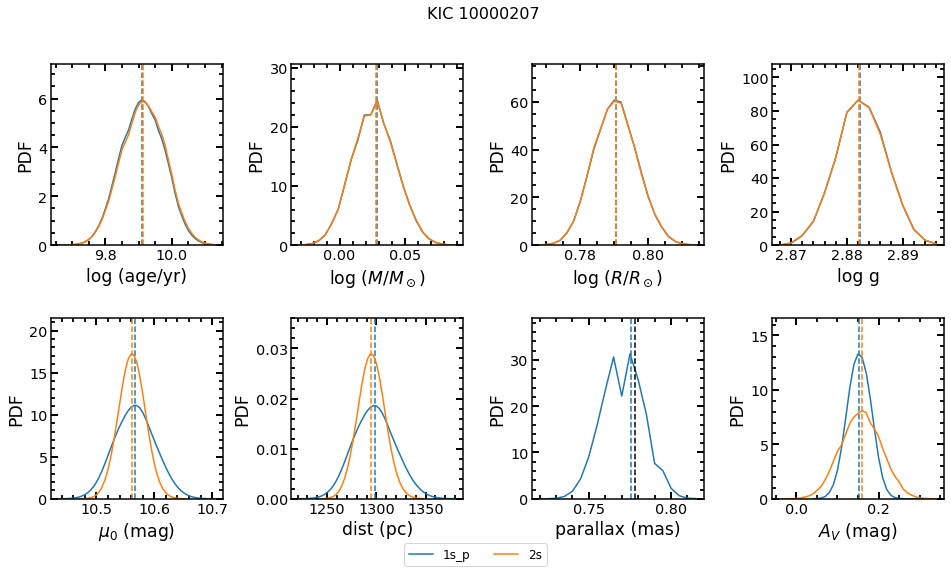

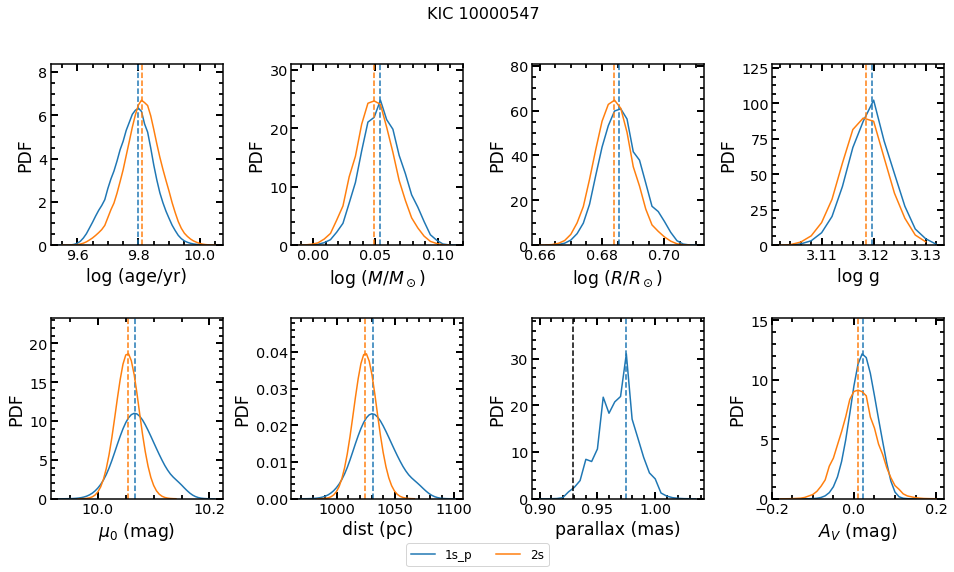

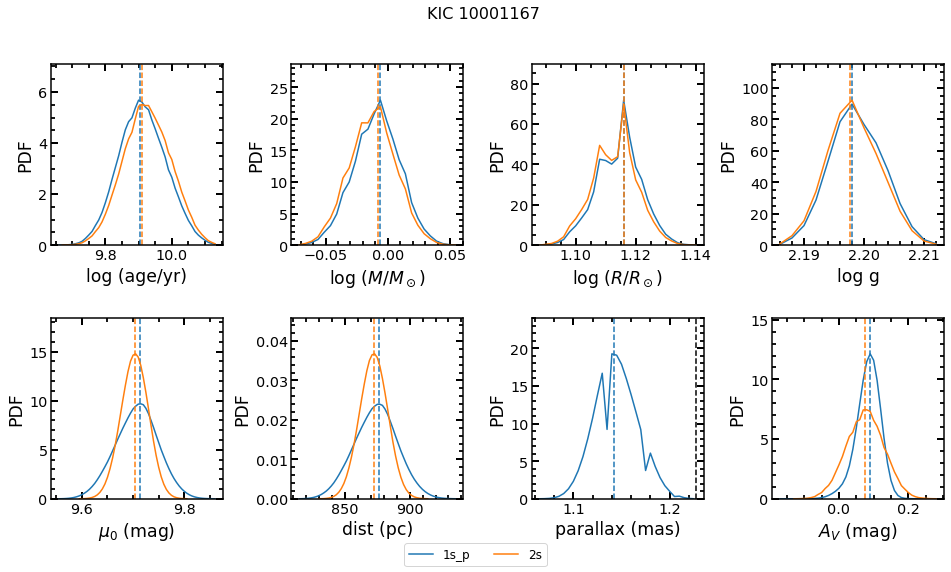

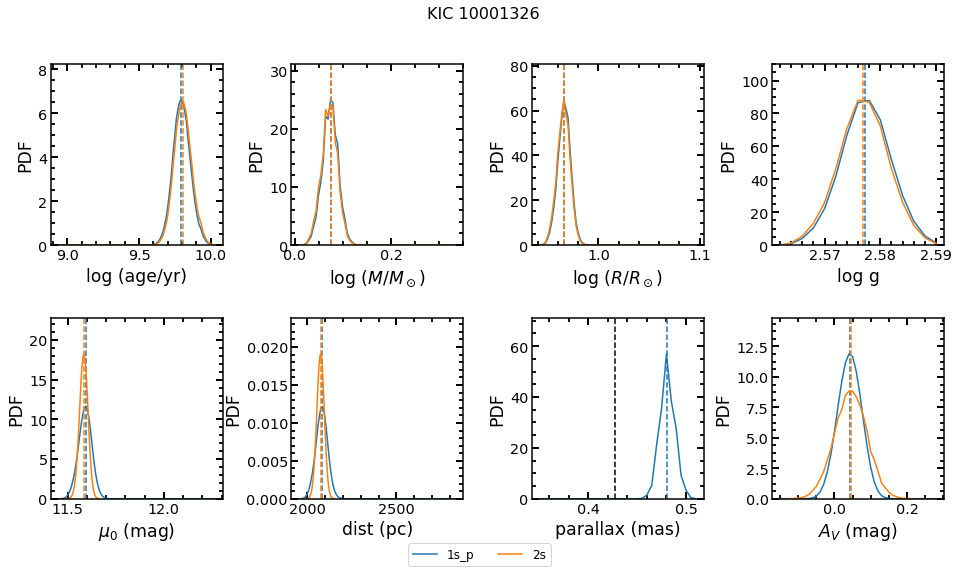

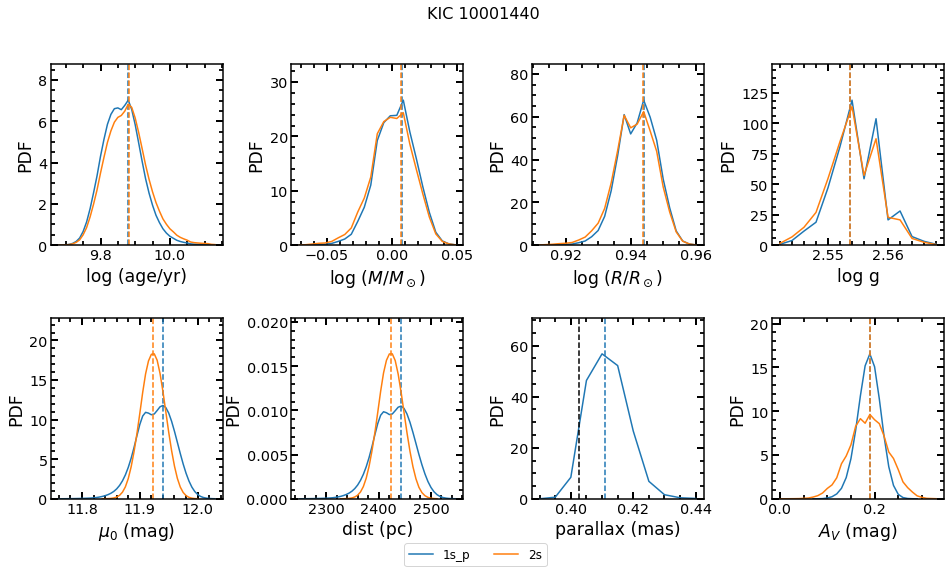

In [6]:
# Ploting PDFs
for star in P2s_M.df.KEPLER_INT:
    pf.plot_npdfs(star,  P1s_p_M, '1s_p', P2s_M, '2s',
                  name_par_col='GAIA_PARALLAX_DR2', # to plot input parallax
                  title="KIC "+str(star))

PDF of the apparent magnitude (top left panel), absolute magnitude (top right), apparent distance modulus (bottom left), and (bottom right) distance modulus for all available passbands as detailed in the legend for the case __2s__. The best-fitting extinction and 68 per cent credible interval is indicated in bottom right panel. Note that these kind of plot represents the second step of the 2 step method, therefore it is not possible to use this function with data from 1 step method.

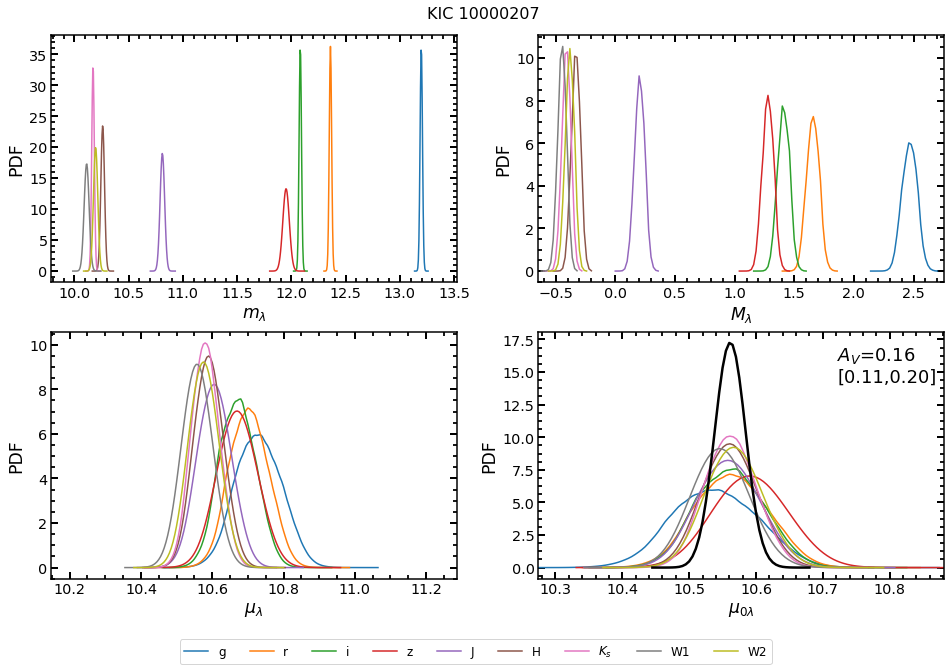

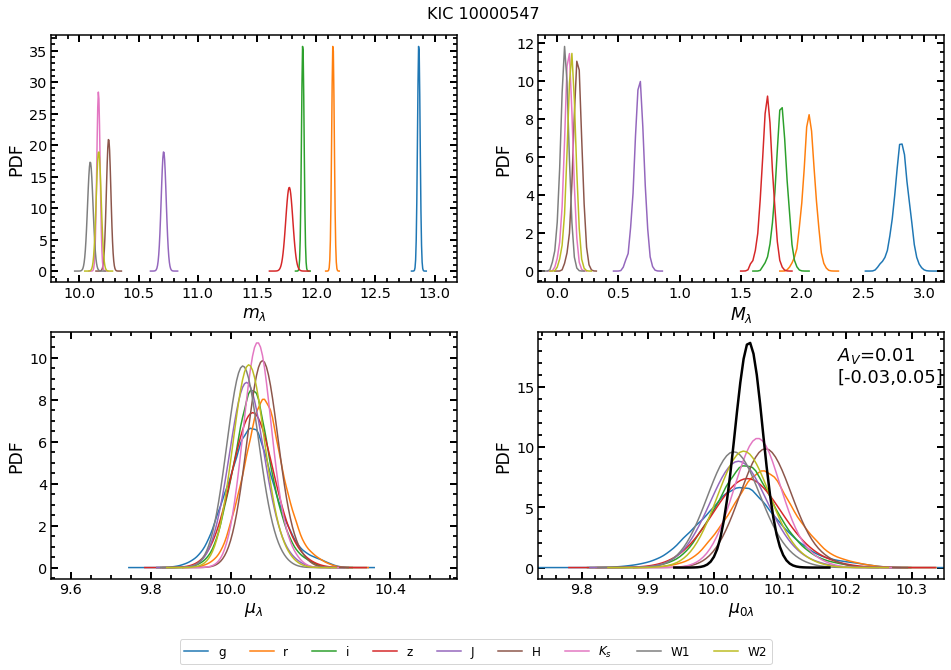

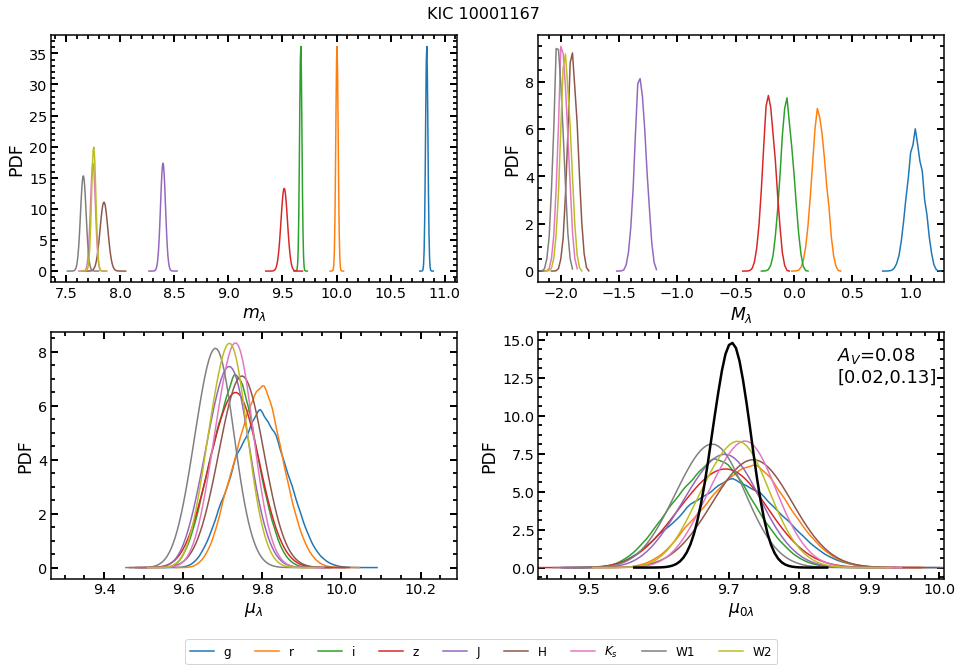

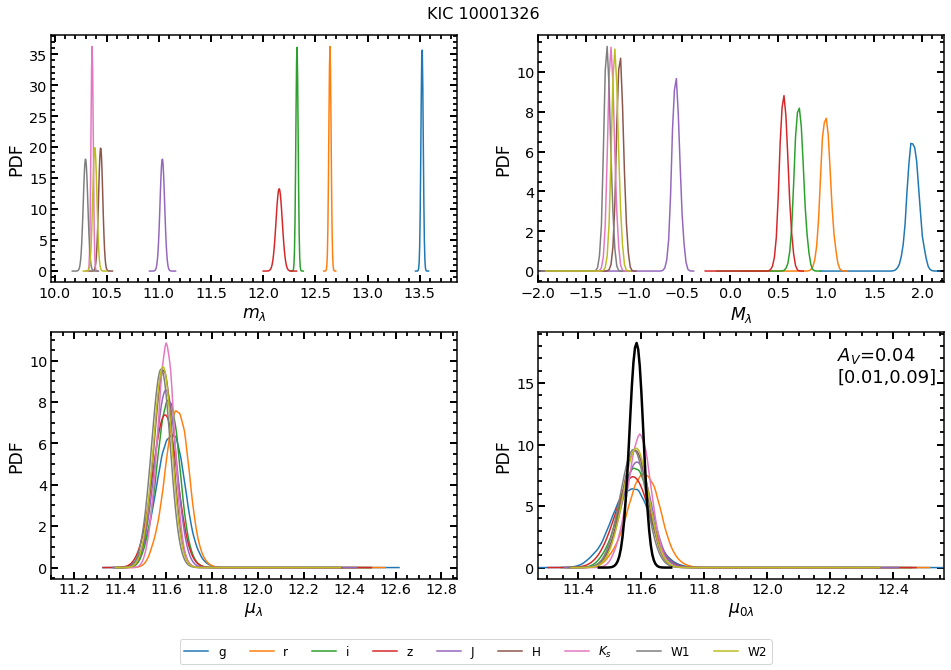

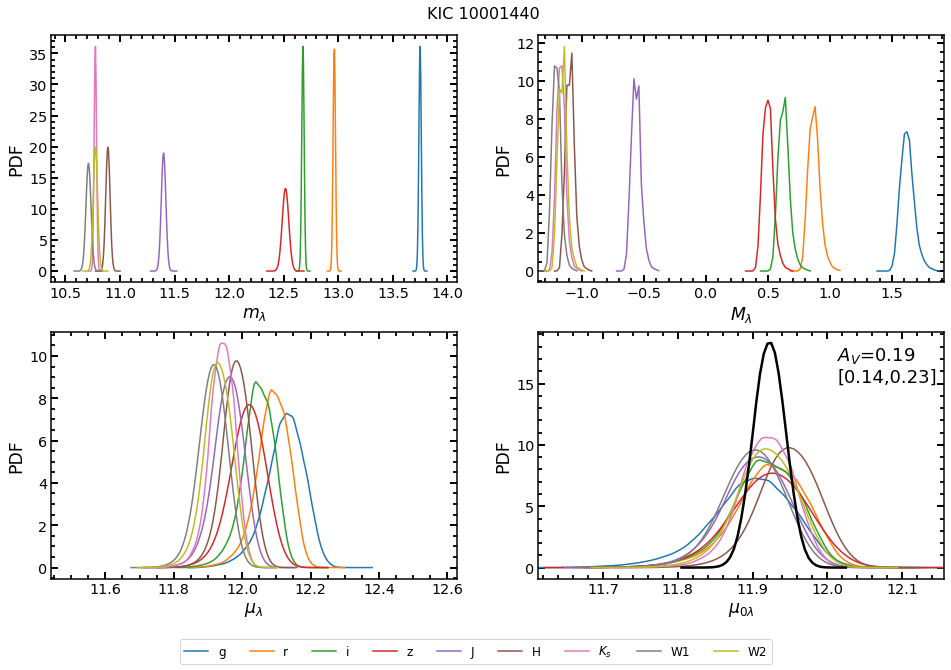

In [7]:
# APOKASC filters
fil_names = ["Kepler", "g", "r", "i", "z", "DDO51_finf",
             "J", "H", "$K_s$", "W1", "W2", "W3", "W4"]

# Ploting pdfs 
for star in P2s_M.df.KEPLER_INT:
    pf.plot_pdfs_m_M_mu_mu0(star, P2s_M, fil_names=fil_names, title="KIC "+str(star))

PDFs of apparent ($m_\lambda$) and absolute ($M_\lambda$) magnitudes for each method and star. Note: PDFs of apparent magnitudes ($m_\lambda$) from 2 step method (__2s__) are simply Normal distributions with standard deviations (1$\sigma$) equal their uncertanties, while from 1 step method (__1s_p__) they are the result from the marginalized posterior distribution, i.e., the marginalized distribution taking into account the combination of all the parameters and apparent magnitudes, and priors.

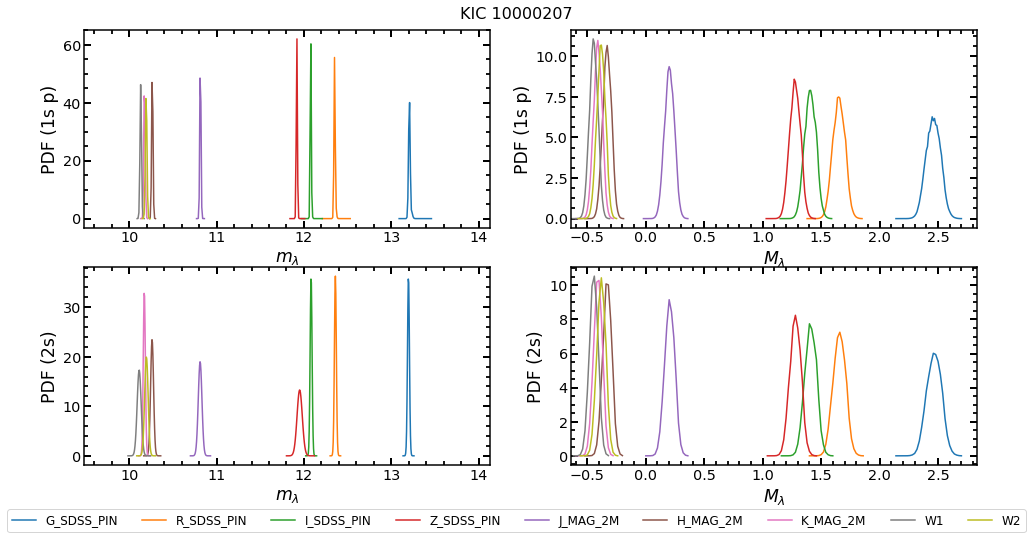

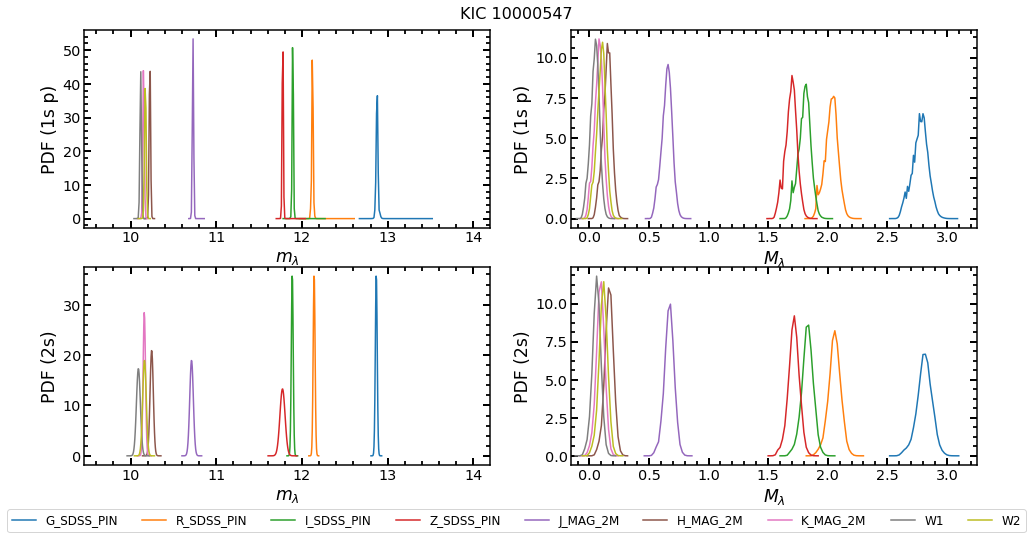

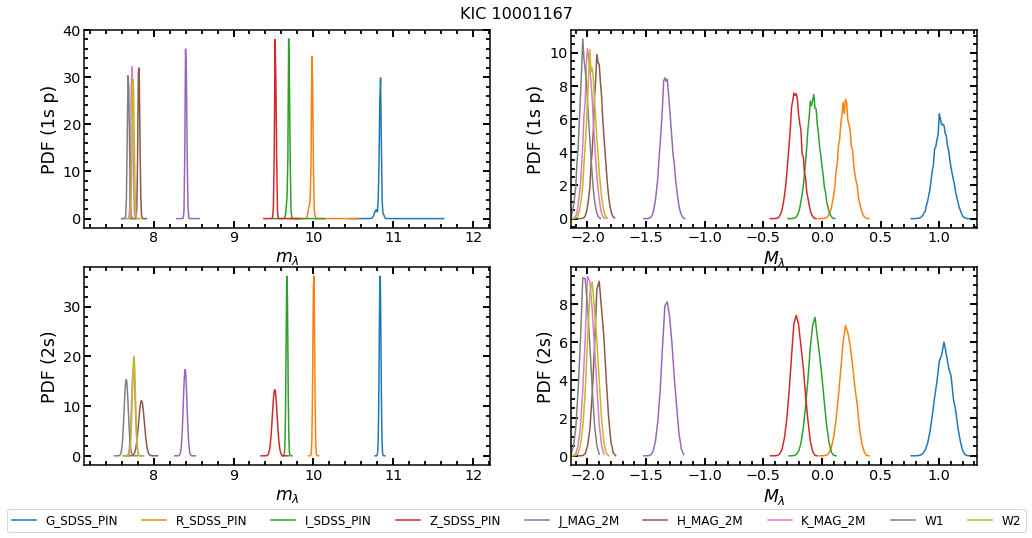

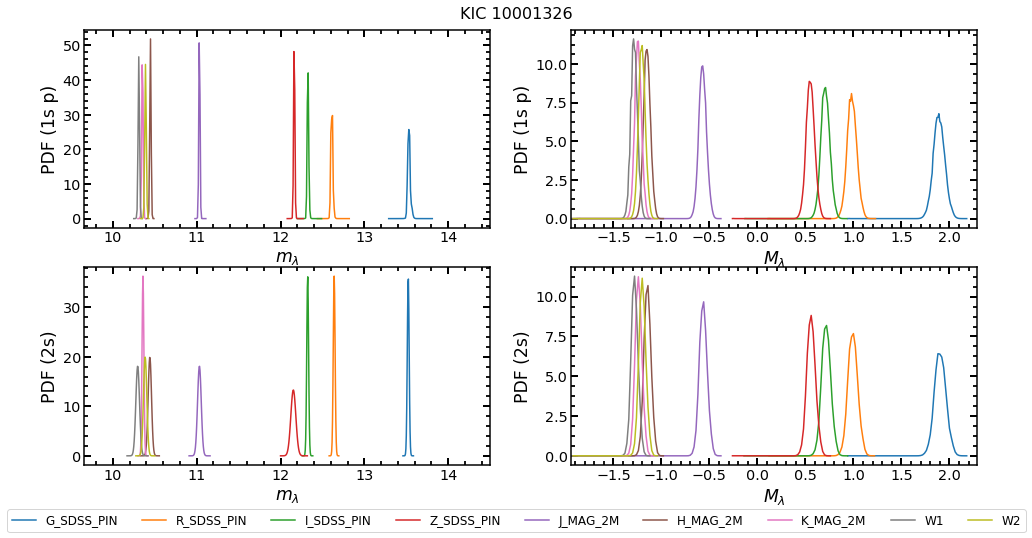

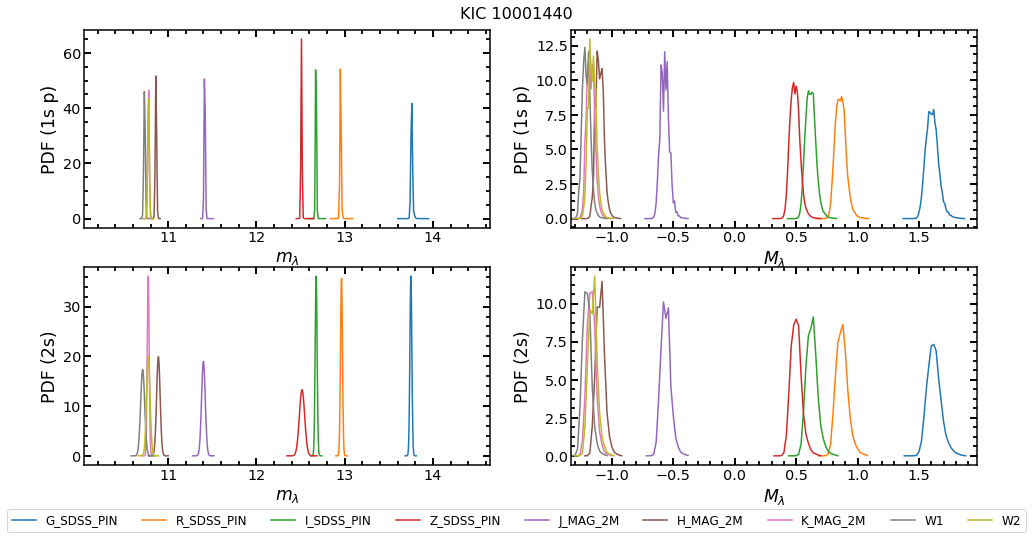

In [8]:
# Ploting comparison of apparent and absolute magnitudes between two cases:
for star in P2s_M.df.KEPLER_INT:
    pf.plot_npdfs_mag(star, P1s_p_M, '1s p', P2s_M, '2s',
                      last_mag_col='W4', title="KIC "+str(star))

PDFs with 68 per cent credible interval (filled area) and mode values (vertical solid line) for mass, distance, and $A_V$ for each method and star.

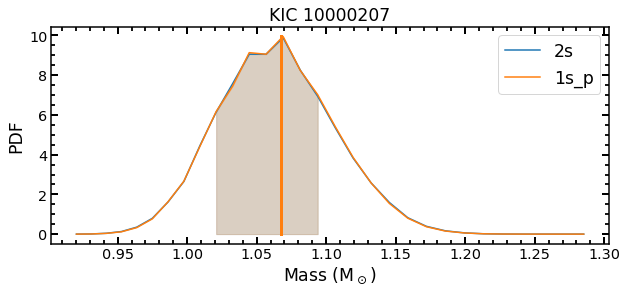

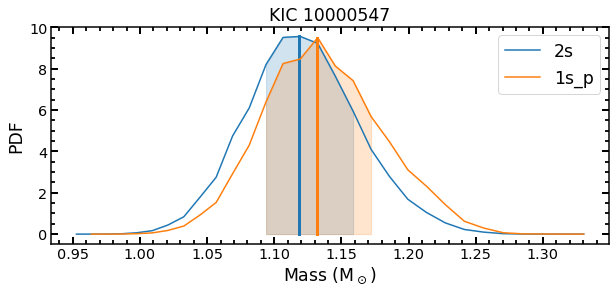

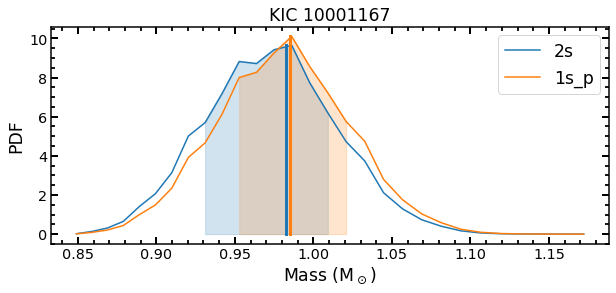

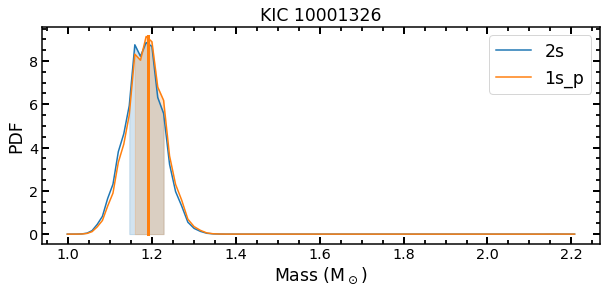

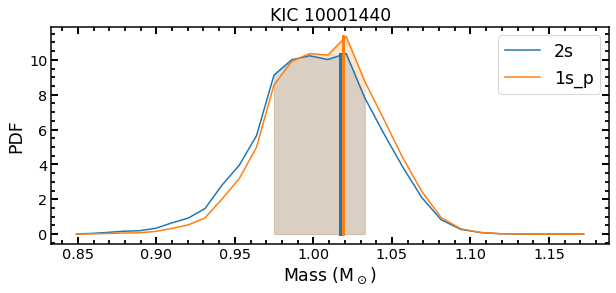

In [9]:
for star in P2s_M.df.KEPLER_INT:
    # Initializing read_pdfs class:
    st_P2s_M = pf.read_pdfs(star, P2s_M.dir)
    st_P1s_p_M = pf.read_pdfs(star, P1s_p_M.dir)

    # Ploting 2 cases
    sts = (st_P2s_M, st_P1s_p_M)
    labels = ("2s", "1s_p")
    colors = ('C0', 'C1')
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for st, l, c in zip(sts, labels, colors):
        st.getPDFmass()
        st.label(l)

        ax.plot(st.mass.m, st.mass.PDF, label=st.label, color=c)
        pf.pdf_fill_between(ax, st.mass.m, st.mass.PDF, 
                    st.mo.mass_68L, st.mo.mass_68U, 
                    alpha=0.2, interpolate=True,  color=c)
        ax.plot([st.mo.mass.values, st.mo.mass.values],
               [0, max(st.mass.PDF)], linewidth=3,  color=c)

    ax.set_xlabel('Mass (M$_\odot$)')
    ax.set_ylabel('PDF')
    ax.set_title('KIC '+ str(star))
    ax.legend()

    plt.show()

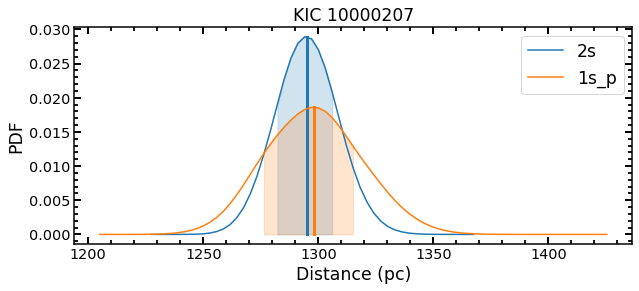

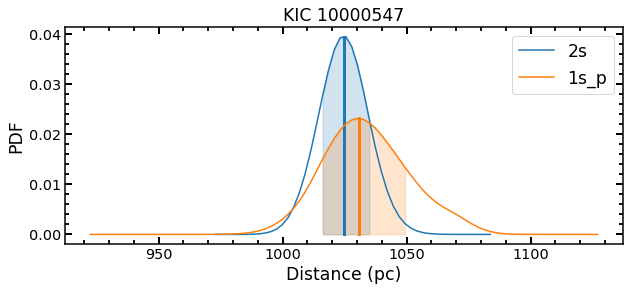

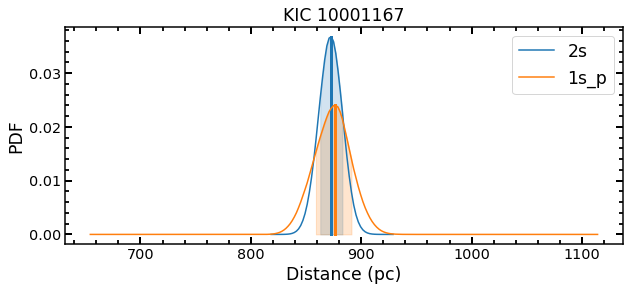

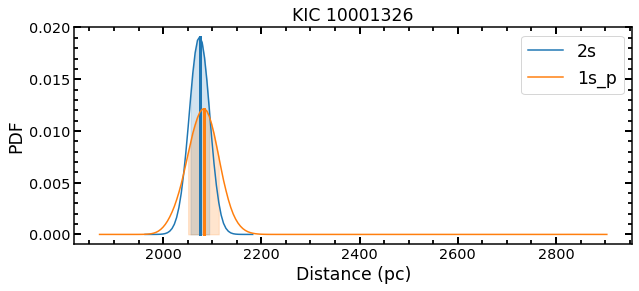

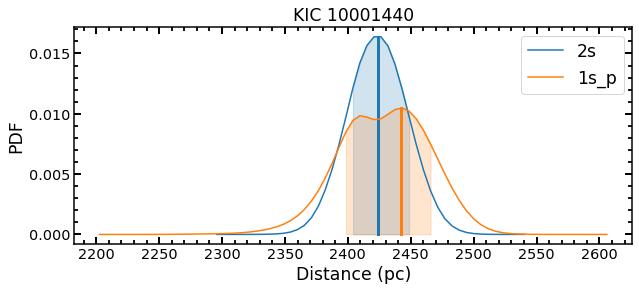

In [10]:
for star in P2s_M.df.KEPLER_INT:
    # Initializing read_pdfs class:
    st_P2s_M = pf.read_pdfs(star, P2s_M.dir)
    st_P1s_p_M = pf.read_pdfs(star, P1s_p_M.dir)

    # Ploting 2 cases
    sts = (st_P2s_M, st_P1s_p_M)
    labels = ("2s", "1s_p")
    colors = ('C0', 'C1')
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for st, l, c in zip(sts, labels, colors):
        st.getPDFdist()
        st.label(l)

        ax.plot(st.dist.dist, st.dist.PDF, label=st.label, color=c)
        pf.pdf_fill_between(ax, st.dist.dist, st.dist.PDF, 
                    st.mo.dist_68L, st.mo.dist_68U, 
                    alpha=0.2, interpolate=True,  color=c)
        ax.plot([st.mo.dist.values, st.mo.dist.values],
               [0, max(st.dist.PDF)], linewidth=3,  color=c)

    ax.set_xlabel('Distance (pc)')
    ax.set_ylabel('PDF')
    ax.set_title('KIC '+ str(star))
    ax.legend()

    plt.show()

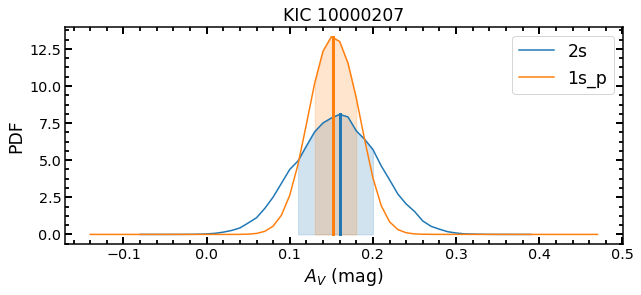

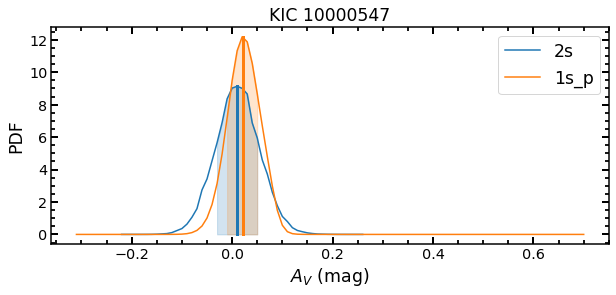

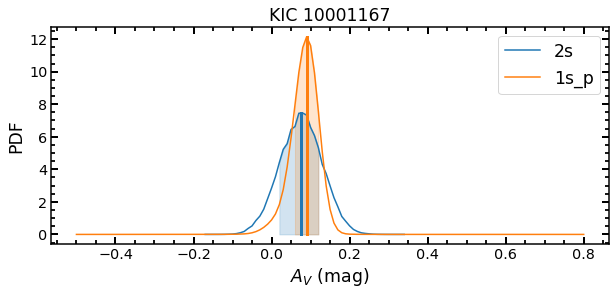

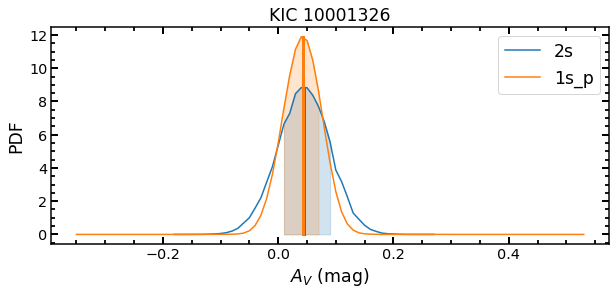

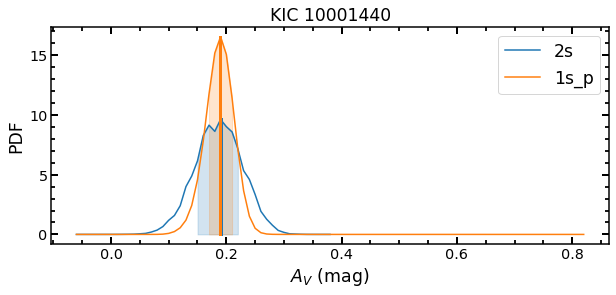

In [11]:
for star in P2s_M.df.KEPLER_INT:
    # Initializing read_pdfs class:
    st_P2s_M = pf.read_pdfs(star, P2s_M.dir)
    st_P1s_p_M = pf.read_pdfs(star, P1s_p_M.dir)

    # Ploting 2 cases
    sts = (st_P2s_M, st_P1s_p_M)
    labels = ("2s", "1s_p")
    colors = ('C0', 'C1')
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for st, l, c in zip(sts, labels, colors):
        st.getPDFAv()
        st.label(l)

        ax.plot(st.Av.Av, st.Av.PDF, label=st.label, color=c)
        pf.pdf_fill_between(ax, st.Av.Av, st.Av.PDF, 
                    st.mo.Av_68L, st.mo.Av_68U, 
                    alpha=0.2, interpolate=True,  color=c)
        ax.plot([st.mo.Av.values, st.mo.Av.values],
               [0, max(st.Av.PDF)], linewidth=3,  color=c)

    ax.set_xlabel('$A_V$ (mag)')
    ax.set_ylabel('PDF')
    ax.set_title('KIC '+ str(star))
    ax.legend()

    plt.show()

# Uncertainties

The mean relative and absolute parameter uncertainties from each case.

In [12]:
# Computing uncertainties
P2s_M = pf.uncertainties(P2s_M)
P1s_p_M = pf.uncertainties(P1s_p_M)

# Dataframe with mean uncertainties
dfs_unc= pd.concat([P2s_M.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].mean(),
                    P1s_p_M.df.loc[:,'rel_unc_age_mo':'abs_unc_Av_mo'].mean()],
                   axis=1, sort=False,
                   keys=['2s', '1s p']).round(3)
str_ind = {'rel_unc_age_mo':'$\sigma (\tau)/\tau $', 'rel_unc_mass_mo':'$\sigma (M)/M $',
           'rel_unc_rad_mo':'$\sigma (R)/R $', 'abs_unc_logg_mo':'$\sigma (\log{g})$',
           'abs_unc_mu0_mo':'$\sigma (\mu_0) $', 'rel_unc_dist_mo':'$\sigma (d)/d $',
           'abs_unc_par_mo':'$\sigma (\\varpi) $', 'abs_unc_Av_mo': '$\sigma (A_V) $'}
dfs_unc = dfs_unc.replace(np.nan, '--', regex=True)
dfs_unc.rename(index=str_ind)

Computing relative uncertainties: (X_68_UCI-X_68_LCI)/X, and absolute uncertainties: X_68_UCI-X_68_LCI
Computing relative uncertainties: (X_68_UCI-X_68_LCI)/X, and absolute uncertainties: X_68_UCI-X_68_LCI


2s   1s p
$\sigma (\tau)/\tau $  0.149  0.146
$\sigma (M)/M $        0.038  0.038
$\sigma (R)/R $        0.015  0.015
$\sigma (\log{g})$     0.004  0.004
$\sigma (\mu_0) $      0.023  0.036
$\sigma (d)/d $         0.01  0.017
$\sigma (A_V) $        0.047  0.030
$\sigma (\varpi) $        --  0.013

# Differences between methods

Relative and absolute differences between 1 step with parallax and 2 step methods using the same input parameters. The $x$ axis shows the values from 2 step method (__2s__), while the relative differences are computed as $(y-x)/x$ and the absolute difference as $(y-x)$, where $y$ is 1 step method (__1s_p__). Error bars in the differences are simply error propagations from the parameter uncertainties.

In [13]:
# Compute abs. diff (y-x), rel. diff (y-x)/x, where x = P2s_M and y = P1s_p_M
P2s_M = pf.differences(P2s_M, P1s_p_M, '1s_2s')

Computing relative differences: (y-x)/x, and absolute differences: y-x


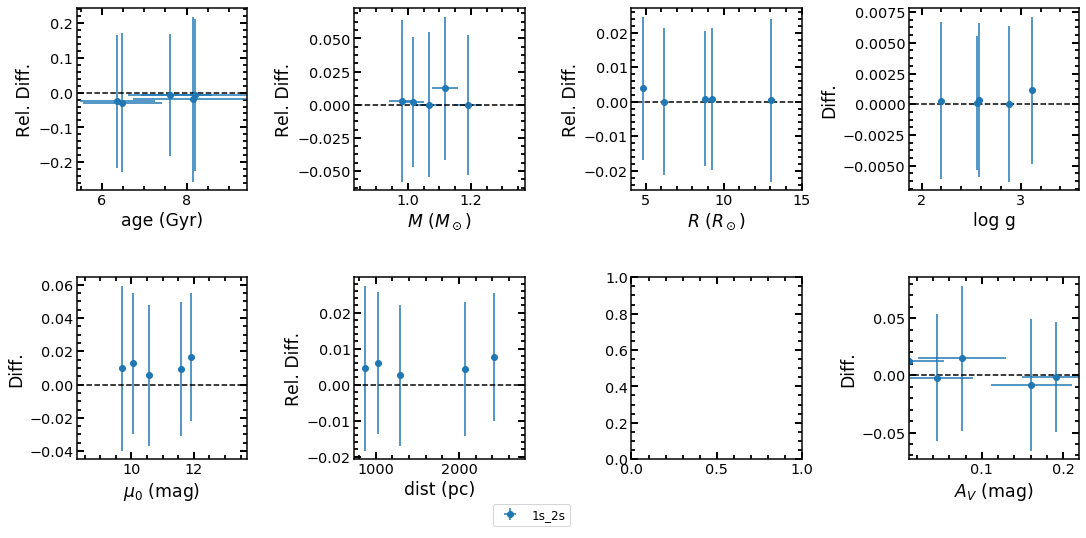

In [14]:
# Plot
pf.plot_diffs(P2s_M, P1s_p_M, '1s_2s', silent=True)

Median, mean, and standard deviation of the relative and absolute differences between 1 and 2 step methods (__1s_p__ and __2s__).

In [15]:
# Dataframe with differences
dfs_diff = pd.concat([P2s_M.df.loc[:,'diffr_age_mo_1s_2s':'diffa_Av_mo_1s_2s_err':2].median(),
                      P2s_M.df.loc[:,'diffr_age_mo_1s_2s':'diffa_Av_mo_1s_2s_err':2].mean(),
                      P2s_M.df.loc[:,'diffr_age_mo_1s_2s':'diffa_Av_mo_1s_2s_err':2].std()],
                     axis=1, sort=False,
                     keys=['median', 'mean', 'std']).round(3)
str_ind = {'diffr_age_mo_1s_2s':'Rel. Dif. Age', 'diffr_mass_mo_1s_2s':'Rel. Dif. Mass',
           'diffr_rad_mo_1s_2s':'Rel. Dif. Radius', 'diffa_logg_mo_1s_2s':'Abs. Dif. $\log{g}$',
           'diffa_mu0_mo_1s_2s':'Abs. Dif. $\mu_0$', 'diffr_dist_mo_1s_2s':'Rel. Dif. Distance',
           'diffa_Av_mo_1s_2s':'Abs. Dif. $A_V$'}
dfs_diff = dfs_diff .replace(np.nan, '--', regex=True)
dfs_diff.rename(index=str_ind)

median   mean    std
Rel. Dif. Age        -0.019 -0.017  0.010
Rel. Dif. Mass        0.002  0.003  0.005
Rel. Dif. Radius      0.001  0.001  0.002
Abs. Dif. $\log{g}$   0.000  0.000  0.000
Abs. Dif. $\mu_0$     0.010  0.011  0.004
Rel. Dif. Distance    0.005  0.005  0.002
Abs. Dif. $A_V$      -0.001  0.003  0.010

# SED fitting

First, you need to create a dataframe with information about the tab_mag used in PARAM. You will find it inside tab_mag_odfnew directory. Note: do not include the "mbol" as a filter.

In [16]:
# Info about tab_mag_apokasc
tab_mag = pd.DataFrame( {'fil' : ('Kep', 'g', 'r', 'i', 'z', 'D51',
                                'J', 'H', 'Ks', 'W1', 'W2', 'W3', 'W4'),
                         'zpkind' : ('AB', 'AB', 'AB', 'AB', 'AB', 'AB',
                                   'Vega', 'Vega', 'Vega', 'Vega', 'Vega', 'Vega', 'Vega'),
                         'zpvega' : (20.680, 19.816, 20.657, 21.289, 21.837, 20.055,
                                   22.932, 23.998, 25.068, 26.864, 28.189, 32.110, 34.907),
                         'zpab' : (20.559, 19.923, 20.515, 20.934, 21.319, 20.118,
                                 22.042, 22.634, 23.234, 24.198, 24.883, 26.970, 28.292),
                         'lambdac' : (6389.68, 4769.82, 6179.99, 7485.86, 8933.86, 5143.24,
                                    12329.79, 16395.59, 21522.05, 33159.26, 45611.97, 107878.20, 219085.73), # in AA
                         'deltalambda' : (3200.0, 1020.0, 920.0, 1040.0, 1340.0, 140.0,
                                        1850.0, 2125.0, 2400.0, 7550.0, 8600.0, 63614.0,42149.0), # in AA
                         'alambda_av' : (0.85946, 1.20585, 0.87122, 0.68319, 0.49246, 1.09497,
                                       0.29434, 0.18128, 0.11838, 0.07134, 0.05511, 0.00220, 0.00000)})
tab_mag

fil zpkind  zpvega    zpab    lambdac  deltalambda  alambda_av
0   Kep     AB  20.680  20.559    6389.68       3200.0     0.85946
1     g     AB  19.816  19.923    4769.82       1020.0     1.20585
2     r     AB  20.657  20.515    6179.99        920.0     0.87122
3     i     AB  21.289  20.934    7485.86       1040.0     0.68319
4     z     AB  21.837  21.319    8933.86       1340.0     0.49246
5   D51     AB  20.055  20.118    5143.24        140.0     1.09497
6     J   Vega  22.932  22.042   12329.79       1850.0     0.29434
7     H   Vega  23.998  22.634   16395.59       2125.0     0.18128
8    Ks   Vega  25.068  23.234   21522.05       2400.0     0.11838
9    W1   Vega  26.864  24.198   33159.26       7550.0     0.07134
10   W2   Vega  28.189  24.883   45611.97       8600.0     0.05511
11   W3   Vega  32.110  26.970  107878.20      63614.0     0.00220
12   W4   Vega  34.907  28.292  219085.73      42149.0     0.00000

If the coefficient ($A_\lambda/A_V) is computed by PARAM for each star (only the case when you use tab_mag_apokasc), you need to read it in order to compute the right value for each absolute magnitude. Otherwise, include the mean coefficient value inside the tab_mag dataframe.

In [17]:
# Reading alambda_av coefficients
if os.path.isdir(P2s_M.dir+"pdfs/AlambAv/"):
    alambda_av = pf.read_alambav(P2s_M)
alambda_av

Id    Kepler         g         r         i         z  DDO51_finf  \
0  10000207  0.816291  1.187240  0.867810  0.680810  0.490620    1.094810   
1  10000547  0.826732  1.192366  0.868000  0.681873  0.490127    1.095000   
2  10001167  0.811005  1.184891  0.867223  0.680223  0.489446    1.094223   
3  10001326  0.814608  1.186493  0.867623  0.680623  0.490246    1.094623   
4  10001440  0.816640  1.187395  0.867849  0.680849  0.490698    1.094849   

          J         H        Ks     W1        W2     W3   W4  
0  0.293810  0.180000  0.118190  0.071  0.055810  0.002  0.0  
1  0.294000  0.180873  0.118000  0.071  0.055127  0.002  0.0  
2  0.293223  0.180000  0.118777  0.071  0.055223  0.002  0.0  
3  0.293623  0.180000  0.118377  0.071  0.055623  0.002  0.0  
4  0.293849  0.180000  0.118151  0.071  0.055849  0.002  0.0

Then you are ready to compute fluxes, absolute magnitudes, and differences between absolute magnitudes for each passband.

In [18]:
cat_mag = pf.compute_flux_and_mag(P2s_M, tab_mag, alambda_av=alambda_av, last_mag_col= 'W4')

## Plotting SED fitting

__Top panel:__ the plotted spectrum represents the flux (or, better, λF λ ) at the stellar surface, for the entry in the ATLAS 9 data base with the closest value in $T_\mathrm{eff}$, $\log{g}$, and [M/H], as the observed star; it is shown for illustrative purposes only. The blue symbols represent the absolute magnitudes of the star, as
inferred from the asteroseismic plus spectroscopic constraints, and converted to the same flux scale as the spectrum. Vertical error bars represent the 68 per cent credible interval, while the horizontal error bars are simply indicating the approximate spectral range of each filter. The orange symbols with error bars are the same but for the observed magnitudes, after corrected by the inferred (mode) PARAM distance and extinction.

__Bottom panel:__ the absolute magnitude differences between the inferred magnitudes and the observed ones, as a function of wavelength. Note that to compute the absolute magnitude that comes from observed apparent magnitudes, we use the PARAM distance modulus and extinction, so it is not completely independent.


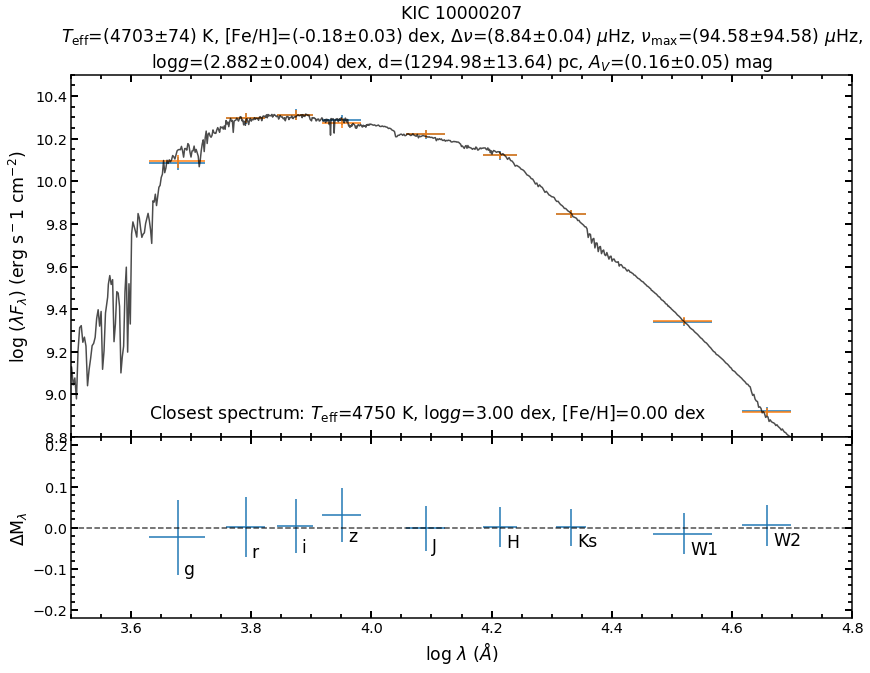

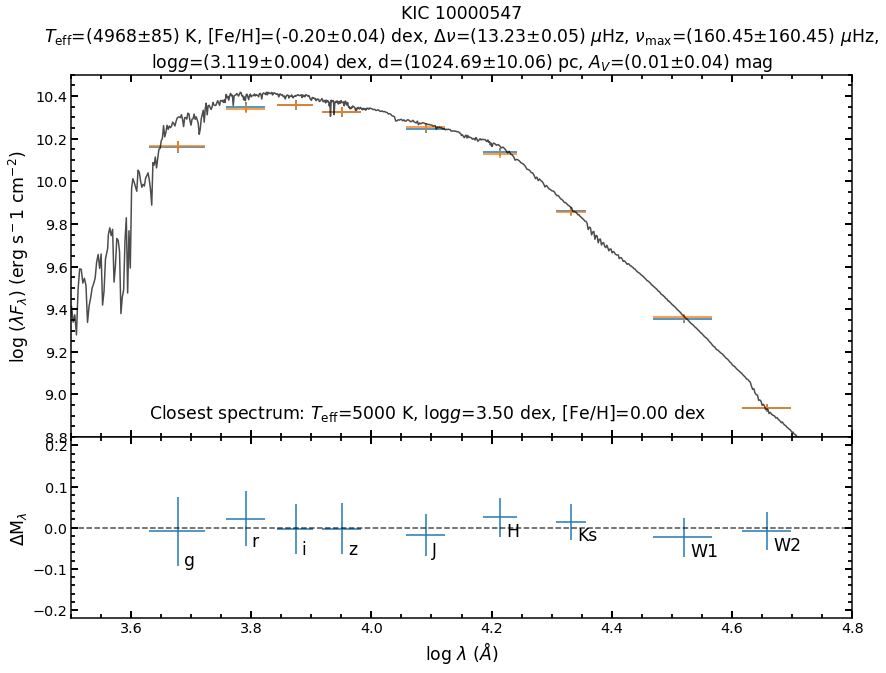

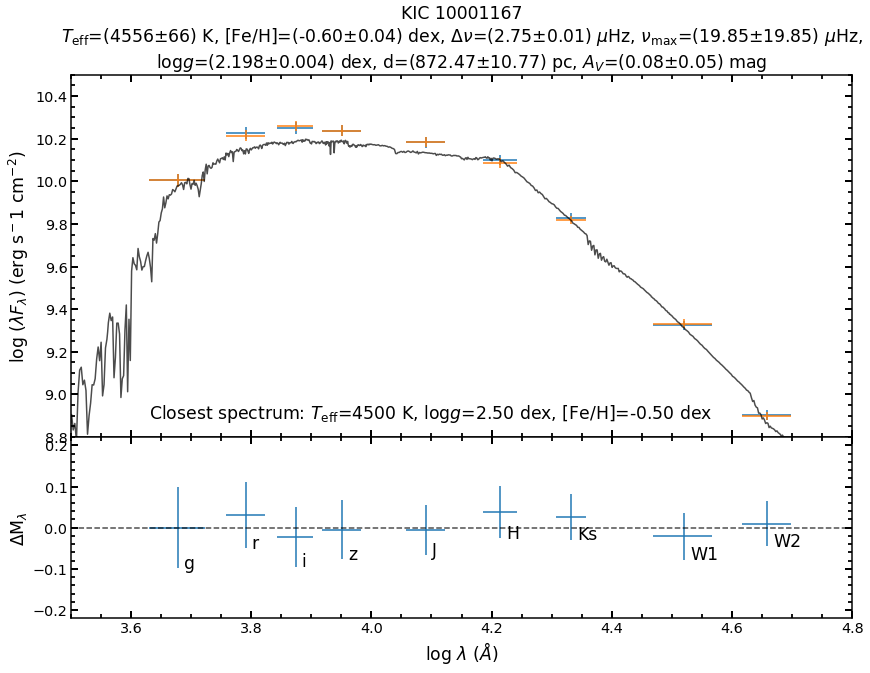

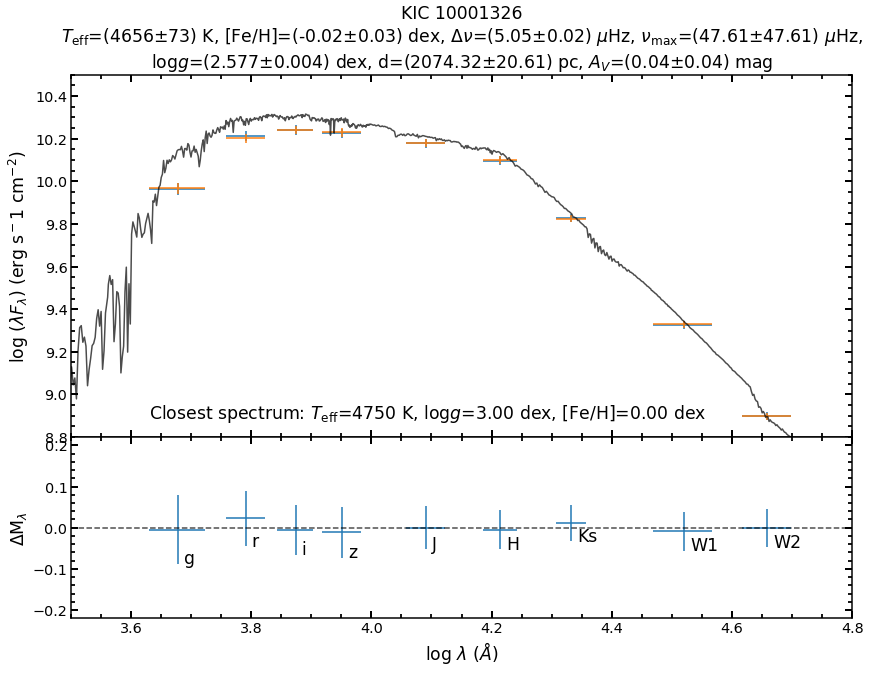

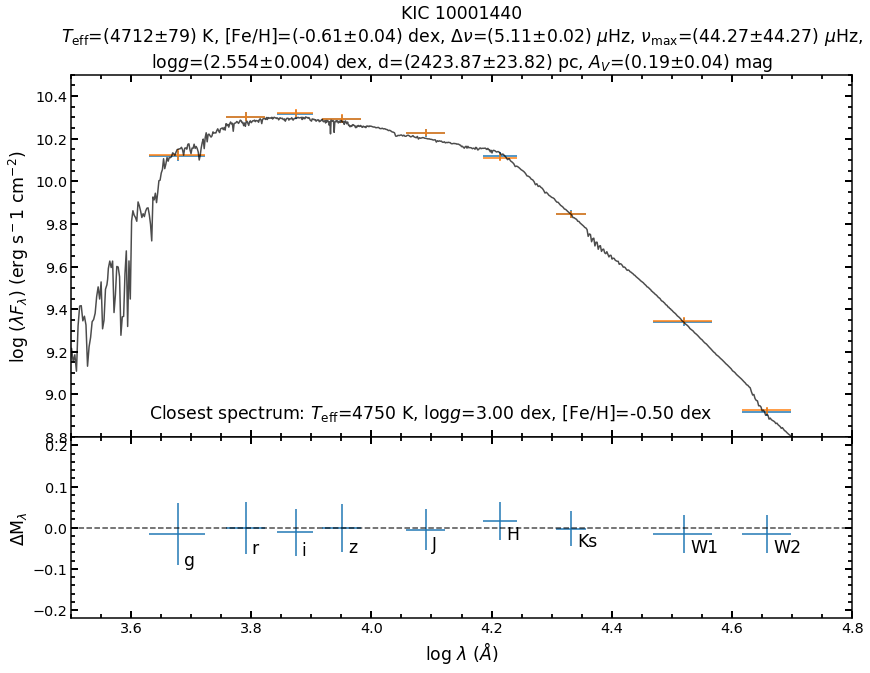

In [19]:
for star in P2s_M.df.KEPLER_INT:
    pf.plot_spectrum(star, P2s_M, cat_mag, tab_mag, kuruczdir='odfnew/')

# Reading evolutionary tracks

If you print an evolutionary track using TRILEGAL/PARAM, you can use the read_tracks function. Note that the track file must contain as columns the initial fraction of metal (Zini), initial mass (Mini), and number of model (n), because they are indexes of the dataframe.

In [20]:
mesa = pf.read_tracks("Samples/mesa.trac")
mesa.head()

age  Mass      logL     logTe      logg  label  \
Mini Zini   n                                                            
0.8  0.0102 0  0.000000e+00   0.8 -0.485459  3.712028  4.626689      0   
            1  1.186444e+09   0.8 -0.464916  3.714458  4.615850      1   
            2  2.411427e+09   0.8 -0.444460  3.717045  4.605733      1   
            3  3.644950e+09   0.8 -0.423499  3.719708  4.595407      1   
            4  4.916047e+09   0.8 -0.400954  3.722498  4.584010      1   

                   logR    logrho    numax  ddeltanu  deltanu  deltanu_mod  \
Mini Zini   n                                                                
0.8  0.0102 0 -0.143531  0.333683  5046.01  0.996638  197.786      199.153   
            1 -0.138118  0.317445  4908.47  0.996540  194.101      195.442   
            2 -0.133066  0.302288  4781.17  0.996440  190.721      192.039   
            3 -0.127911  0.286824  4654.85  0.996458  187.356      188.650   
            4 -0.122219  0.269746  4519.82  0.996509  183.715      184.984   

                pspaci  pcoupl  Zini_st    FeHini  mbolmag  Keplermag   gmag  \
Mini Zini   n                                                                  
0.8  0.0102 0  3957.96     0.5   0.0102 -0.244649    5.984      5.997  6.589   
            1  3281.01     0.5   0.0102 -0.244649    5.932      5.942  6.522   
            2  2692.26     0.5   0.0102 -0.244649    5.881      5.886  6.455   
            3  2331.70     0.5   0.0102 -0.244649    5.829      5.829  6.386   
            4  2069.35     0.5   0.0102 -0.244649    5.772      5.767  6.312   

                rmag   imag   zmag  DDO51_finfmag   Jmag   Hmag  Ksmag  W1mag  \
Mini Zini   n                                                                   
0.8  0.0102 0  5.927  5.737  5.655          6.399  4.667  4.222  4.161  4.136   
            1  5.871  5.686  5.607          6.329  4.625  4.187  4.127  4.103   
            2  5.816  5.635  5.559          6.260  4.583  4.153  4.094  4.070   
            3  5.759  5.582  5.510          6.188  4.541  4.118  4.060  4.037   
            4  5.698  5.526  5.458          6.112  4.495  4.080  4.024  4.001   

               W2mag  W3mag  W4mag  
Mini Zini   n                       
0.8  0.0102 0  4.175  4.115  4.105  
            1  4.140  4.082  4.071  
            2  4.106  4.050  4.040  
            3  4.072  4.018  4.007  
            4  4.035  3.982  3.971

Then your track dataframe can be selected using the pandas query method.

In [21]:
# Selecting by index: Mini==1.0 & Zini==0.0172, and by label of Helium-burning phase: label==4
mesa.query("Mini==1.0 & Zini==0.012 & label==4").head()

age   Mass      logL     logTe      logg  label  \
Mini Zini  n                                                               
1.0  0.012 105  1.239047e+10  0.959  1.723272  3.675423  2.350344      4   
           106  1.239100e+10  0.959  1.700475  3.677252  2.380455      4   
           107  1.239651e+10  0.959  1.722649  3.675493  2.351153      4   
           108  1.239778e+10  0.959  1.725201  3.675347  2.347993      4   
           109  1.240353e+10  0.959  1.723232  3.676004  2.352503      4   

                   logR   logrho    numax  ddeltanu  deltanu  deltanu_mod  \
Mini Zini  n                                                                
1.0  0.012 105  1.03405 -3.12014  27.8936  1.000010  3.72135      3.74707   
           106  1.01899 -3.07497  29.8698  1.001090  3.92422      3.95134   
           107  1.03359 -3.11879  27.9848  1.000020  3.72679      3.75255   
           108  1.03516 -3.12349  27.7811  0.999991  3.70648      3.73209   
           109  1.03286 -3.11659  28.0562  1.001020  3.73949      3.76533   

                 pspaci  pcoupl  Zini_st    FeHini  mbolmag  Keplermag   gmag  \
Mini Zini  n                                                                    
1.0  0.012 105  277.471     0.5    0.012 -0.171458    0.462      0.562  1.330   
           106  266.338     0.5    0.012 -0.171458    0.519      0.613  1.372   
           107  256.039     0.5    0.012 -0.171458    0.463      0.563  1.331   
           108  255.388     0.5    0.012 -0.171458    0.457      0.557  1.326   
           109  260.858     0.5    0.012 -0.171458    0.462      0.560  1.326   

                 rmag   imag   zmag  DDO51_finfmag   Jmag   Hmag  Ksmag  \
Mini Zini  n                                                              
1.0  0.012 105  0.491  0.238  0.100          1.034 -0.988 -1.529 -1.614   
           106  0.542  0.292  0.158          1.076 -0.925 -1.461 -1.545   
           107  0.492  0.239  0.102          1.035 -0.986 -1.528 -1.612   
           108  0.487  0.233  0.095          1.030 -0.993 -1.535 -1.620   
           109  0.489  0.237  0.100          1.029 -0.986 -1.526 -1.610   

                W1mag  W2mag  W3mag  W4mag  
Mini Zini  n                                
1.0  0.012 105 -1.654 -1.581 -1.684 -1.692  
           106 -1.583 -1.512 -1.613 -1.622  
           107 -1.652 -1.579 -1.682 -1.690  
           108 -1.659 -1.586 -1.689 -1.698  
           109 -1.649 -1.577 -1.679 -1.688

Initial surface metal content and metallicity for MESA models.

In [22]:
# Zini and [Fe/H] table
tab_Z_FeH = pd.DataFrame()
zinis = (0.0104, 0.0110, 0.0118, 0.012, 0.013, 0.014, 0.015, 0.016)
for z in zinis:
    tab_Z_FeH = tab_Z_FeH.append({'$Z_{ini}$': mesa.query("Zini==@z and Mini==1.0 and n==1")['Zini_st'].min(),
                                      '[Fe/H]': mesa.query("Zini==@z and Mini==1.0 and n==1")['FeHini'].min()},
                                      ignore_index=True )
tab_Z_FeH.round(4)

$Z_{ini}$  [Fe/H]
0     0.0104 -0.2359
1     0.0110 -0.2106
2     0.0118 -0.1790
3     0.0120 -0.1715
4     0.0130 -0.1354
5     0.0140 -0.1020
6     0.0150 -0.0710
7     0.0160 -0.0419

HR diagram with MESA evolutionary tracks from 0.8 to 1.2 $M_\odot$, at step of 0.1 $M_\odot$ with initial surface metal fraction $Z_{ini}$=0.012, and metallicity [Fe/H]=-0.172. The former is similar to the metallicity of KIC 10000207. Left panel is a zoom in the position of KIC 10000207. PARAM output luminosity and effective temperature, with their respective uncertaintes, for each case also shown.

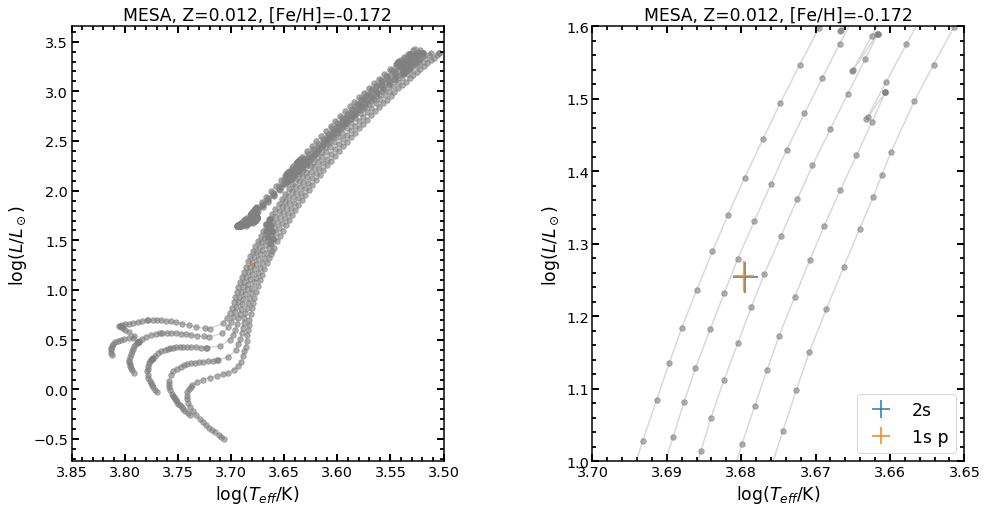

In [23]:
# Computing log Teff and log L param
objs = (P2s_M, P1s_p_M)
for obj in objs:
    obj.df['logTeff_imo'] = np.log10(obj.df.Teff_imo)
    obj.df['logTeff_eL_imo'] = np.log10(obj.df.Teff_imo)-np.log10(obj.df.Teff_68L_imo)
    obj.df['logTeff_eU_imo'] = np.log10(obj.df.Teff_68U_imo)-np.log10(obj.df.Teff_imo)
    obj.df['logL_eL_mo'] = obj.df.logL_mo-obj.df.logL_68L_mo
    obj.df['logL_eU_mo'] = obj.df.logL_68U_mo-obj.df.logL_mo
    
    
star=10000207
zini=0.012
mh=-0.172
labels = ('2s', '1s p')
dfs = [P2s_M.df.loc[P2s_M.df[P2s_M.df.columns[0]]==star],
      P1s_p_M.df.loc[P1s_p_M.df[P1s_p_M.df.columns[0]]==star]]

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
for ax in axs:
    for mini in (0.8,0.9,1.0,1.1,1.2):
        mesa[mesa.label.isin([1,2,3])].query('Mini==@mini and Zini==@zini').plot('logTe', 'logL',
                                                                                 c='gray', alpha=0.3,
                                                                                 ax=ax,
                                                                                 legend=False, label="")
        mesa[mesa.label.isin([4,5,6,7])].query('Mini==@mini and Zini==@zini').plot('logTe', 'logL',
                                                                                   c='gray', alpha=0.3,
                                                                                   ax=ax,
                                                                                   legend=False, label="")
        mesa[mesa.label.isin([1,2,3])].query('Mini==@mini and Zini==@zini').plot.scatter('logTe', 'logL',
                                                                                         c='gray',
                                                                                         ax=ax, s=30,
                                                                                         alpha=0.6)
        mesa[mesa.label.isin([4,5,6,7])].query('Mini==@mini and Zini==@zini').plot.scatter('logTe', 'logL',
                                                                                         c='gray',
                                                                                         ax=ax, s=30,
                                                                                         alpha=0.6)

    
    # Ploting cases
    for df, i in zip(dfs, range(0, len(labels))):
        ax.errorbar(df['logTeff_imo'], df.logL_mo, fmt='none', #ms=5,
                xerr=df[['logTeff_eL_imo', 'logTeff_eU_imo']].values, 
                yerr=df[['logL_eL_mo','logL_eU_mo']].values,
                label=labels[i])    

    ax.tick_params(axis='both', direction='in', top=True, right=True)
    ax.set_xlabel('$\log(T_{eff}$/K)')
    ax.set_ylabel('$\log(L/L_\odot)$ ')
    ax.set_title('MESA, Z='+str(zini)+', [Fe/H]='+str(mh))
    ax.set_xlim(3.85, 3.5)

ax.set_ylim(1.0, 1.6)
ax.set_xlim(3.7, 3.65)
ax.legend(loc=4)
plt.show()
